In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
img = cv2.imread('lenna.jpg',1)

In [6]:
def my_show(img):
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

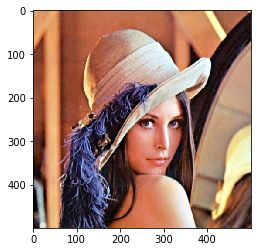

In [7]:
my_show(img)

## 1.Gaussian Kernel（用于图像进行模糊处理）

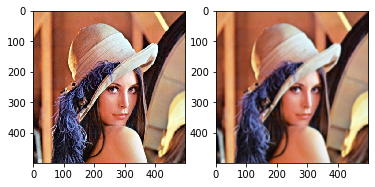

In [8]:
g_img = cv2.GaussianBlur(img,(11,11),2)   #高斯核为11*11的矩阵,方差为2
plt.subplot(121)
my_show(img)
plt.subplot(122)
my_show(g_img)

In [9]:
kernel_1d = cv2.getGaussianKernel(11,2)  # 获得长度为11方差为2的高斯核X方向一维矩阵

In [10]:
kernel_1d

array([[0.00881223],
       [0.02714358],
       [0.06511406],
       [0.12164907],
       [0.17699836],
       [0.20056541],
       [0.17699836],
       [0.12164907],
       [0.06511406],
       [0.02714358],
       [0.00881223]])

In [11]:
g1_img = cv2.sepFilter2D(img,-1,kernel_1d,kernel_1d)    # 输出图像深度为-1（即深度不变），x和y方向分别做kernel_1d高斯变换后相乘

In [14]:
g1_img,g_img    # 说明对图片进行高斯模糊效果和对图片进行x,y方向分别做一维高斯模糊然后相乘后的效果一样

(array([[[136, 158, 219],
         [135, 158, 219],
         [134, 158, 219],
         ...,
         [113, 156, 220],
         [107, 152, 216],
         [105, 151, 214]],
 
        [[135, 158, 219],
         [135, 158, 219],
         [134, 158, 219],
         ...,
         [113, 155, 217],
         [107, 151, 213],
         [105, 149, 211]],
 
        [[133, 158, 220],
         [133, 158, 219],
         [132, 158, 219],
         ...,
         [111, 150, 209],
         [106, 145, 204],
         [103, 143, 202]],
 
        ...,
 
        [[ 13,  19,  19],
         [ 14,  19,  20],
         [ 14,  20,  21],
         ...,
         [ 47,  72, 132],
         [ 47,  73, 135],
         [ 47,  73, 136]],
 
        [[ 13,  19,  18],
         [ 13,  19,  19],
         [ 14,  20,  20],
         ...,
         [ 49,  74, 137],
         [ 49,  75, 140],
         [ 49,  75, 141]],
 
        [[ 13,  18,  18],
         [ 13,  19,  18],
         [ 14,  20,  20],
         ...,
         [ 49,  75, 138],
  

## 2.laplacian（二阶导，主要注重于边缘信息，提取边缘的边缘）

In [15]:
kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]]) #普通版的拉普拉斯算子，由二阶导1，-2，1算子（x2-2x1+x）进行x轴和y轴二阶导相加而得（梯度和散度）

In [16]:
kernel

array([[ 0,  1,  0],
       [ 1, -4,  1],
       [ 0,  1,  0]])

In [18]:
lap_img = cv2.filter2D(img,-1,kernel)

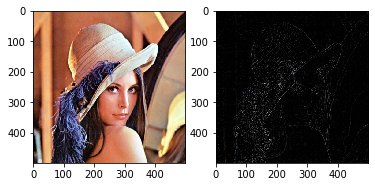

In [19]:
g_img = cv2.GaussianBlur(img,(11,11),2)
plt.subplot(121)
my_show(img)
plt.subplot(122)
my_show(lap_img)   # 由打印出的图像可知，该算子主要求出的是图像边缘信息

In [60]:
kernel_strong = np.array([[1,1,1],[1,-8,1],[1,1,1]])    #加强版版的拉普拉斯算子，普通版旋转45度后加上普通版结果
lap_img = cv2.filter2D(img,-1,kernel_strong)

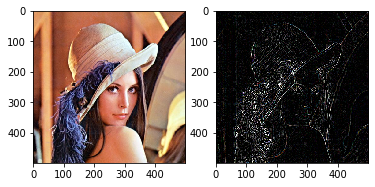

In [54]:
plt.subplot(121)
my_show(img)
plt.subplot(122)
my_show(lap_img)

## 3.图像锐化         锐化 = 原图 + 二阶导信息，即二阶导中心加1）（原图就是中心为1，其他地方为0）增强边缘信息，与模糊类似于方向操作

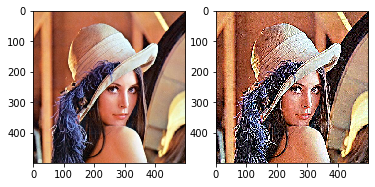

In [36]:
kernel_strong = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])   # 加强版的拉普拉斯算子去负加1
lap_img = cv2.filter2D(img,-1,kernel_strong)
plt.subplot(121)
my_show(img)
plt.subplot(122)
my_show(lap_img)

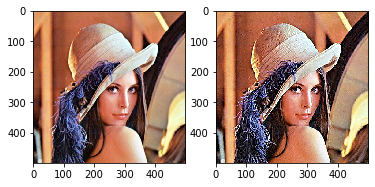

In [34]:
kernel_strong = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])   # 普通版的拉普拉斯算子去负加1
lap_img = cv2.filter2D(img,-1,kernel_strong)
plt.subplot(121)
my_show(img)
plt.subplot(122)
my_show(lap_img)

## 4.sobel算子（一阶导，用于识别图像边缘）

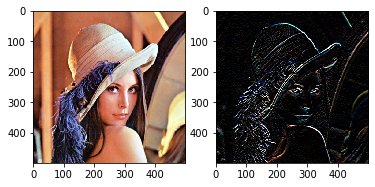

In [35]:
y_kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])   # y方向的一阶导，一阶导算子为1，0，-1（x2-x1）/2
sy_img = cv2.filter2D(img,-1,y_kernel)
plt.subplot(121)
my_show(img)
plt.subplot(122)
my_show(sy_img)

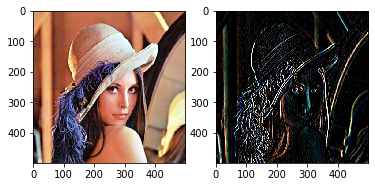

In [36]:
x_kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])      # x方向的一阶导，一阶算子1，0，-1
sx_img = cv2.filter2D(img,-1,x_kernel)
plt.subplot(121)
my_show(img)
plt.subplot(122)
my_show(sx_img)

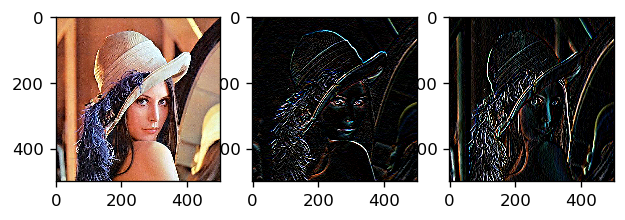

In [38]:
plt.figure(figsize=(6,6),dpi=120)
plt.subplot(132)
my_show(sy_img)   # y方向的一阶导信息
plt.subplot(133)
my_show(sx_img)   # x方向的一阶导信息
plt.subplot(131)
my_show(lap_img)


## 5.medianblur（中值滤波，过滤高频和底频噪声，也常用于图片模糊操作）       
## 模糊 = 降噪=低通，将高频信号降掉

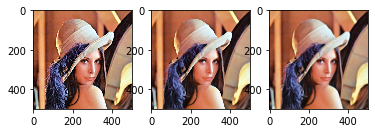

In [40]:
md_img = cv2.medianBlur(img,7)     # 中值滤波核矩阵为7*7大小,中值滤波是将数字排序只取中间数字其他数字不要（其卷积核没有确切数值）
plt.subplot(131)
my_show(img)
plt.subplot(132)
my_show(md_img)
plt.subplot(133)
my_show(g_img)

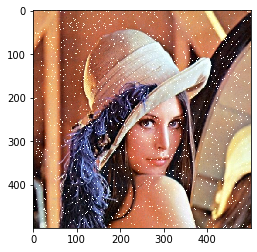

In [42]:
noise_img = cv2.imread('noisy_lenna.jpg',1)     # noisy_lenna.jpg这张图是带有椒盐噪声的图片（salt and paper），此时用中值滤波比高斯滤波好
my_show(noise_img)

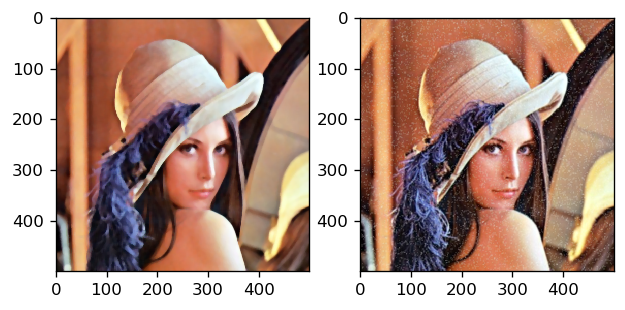

In [58]:
plt.figure(figsize=(6,6),dpi=120)
plt.subplot(121)
denoise_img = cv2.medianBlur(noise_img,7)   # 中值滤波降噪
my_show(denoise_img)
plt.subplot(122)
denoise_img2 = cv2.GaussianBlur(noise_img,(3,3),2)    # 高斯模糊降噪
my_show(denoise_img2)

## 6.Harris Corner（该算法是判断图像的角点位置的，处理前第一步需要将图片变成灰度图,这样计算量小些，处理容易些的。）

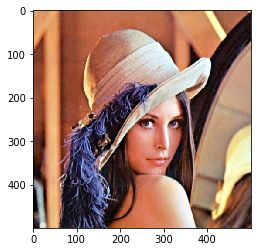

In [59]:
my_show(img)

In [60]:
img_gray = (cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))

In [61]:
def my_show_gray(img):
    plt.imshow(img,cmap='gray')

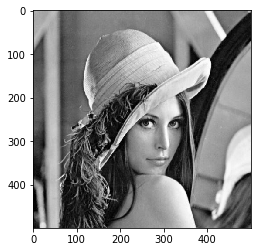

In [62]:
my_show_gray(img_gray)

In [63]:
img_harris = cv2.cornerHarris(img_gray,2,3,0.03)       # 2,3单位是像素分别为CornerHarris的矩形选框长宽，0.03为超参k的值，都可以自己设定。

In [76]:
img_harris   # img_harris为lenna灰度图每个位置的R值

array([[-5.0184933e-11, -5.0184933e-11, -7.5757067e-11, ...,
         2.9226129e-07, -2.0915779e-05, -1.3639418e-05],
       [-5.0184933e-11, -5.0184933e-11, -7.5757067e-11, ...,
         2.9226129e-07, -2.0915779e-05, -1.3639418e-05],
       [ 1.0191788e-10,  1.0191788e-10,  1.4008253e-10, ...,
         3.4895913e-07, -2.4456740e-05, -1.4876613e-05],
       ...,
       [ 8.3326270e-08,  8.3326270e-08,  2.3818377e-07, ...,
         4.2201668e-07, -1.8662310e-07, -1.9364138e-07],
       [-6.7837291e-09, -6.7837291e-09,  1.6841142e-09, ...,
         1.0552327e-07,  2.5537084e-09, -5.7905471e-08],
       [-2.4616487e-08, -2.4616487e-08,  3.5491801e-08, ...,
         3.0859104e-09,  1.4322606e-08,  1.9929765e-08]], dtype=float32)

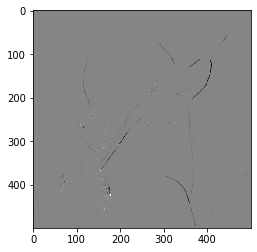

In [77]:
my_show_gray(img_harris)   

In [65]:
threshold = np.max(img_harris)*0.02     # 设置阈值R为threshold，其值限定为img_harris最大值的百分之2

In [66]:
threshold

0.00016283337026834488

In [67]:
img = cv2.imread('lenna.jpg',1)
img[img_harris>threshold] = [0,0,255]   # 将图像中超过阈值R的点设置为红色，[0,0,255]为红色，故由上可以看出红色的为角点处

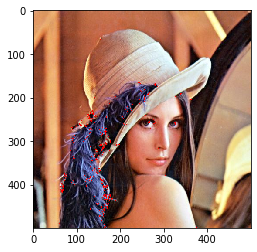

In [68]:
my_show(img)

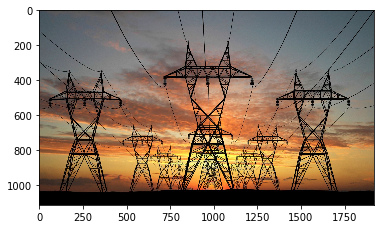

In [69]:
img_t = cv2.imread('towers.jpg',1)
my_show(img_t)

In [81]:
imgt_gray = (cv2.cvtColor(img_t,cv2.COLOR_BGR2GRAY))
imgt_harris = cv2.cornerHarris(imgt_gray,2,3,0.03)
imgt_harris = cv2.dilate(imgt_harris,None)  # 由于角点找的并不明显所以可以先对imgt_harris进行膨胀操作？？？imgt_harris可以这样操作么
imgt_harris

array([[-4.5408838e-10, -2.8326641e-10,  2.0271040e-10, ...,
         2.6232112e-07,  9.3627059e-06,  9.3627059e-06],
       [-4.5408838e-10, -2.8326641e-10,  2.0271040e-10, ...,
         2.6232112e-07,  9.5346804e-05,  9.5346804e-05],
       [-1.3286509e-10, -4.4316571e-11,  2.0271040e-10, ...,
         2.6232112e-07,  1.9505988e-04,  1.9505988e-04],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

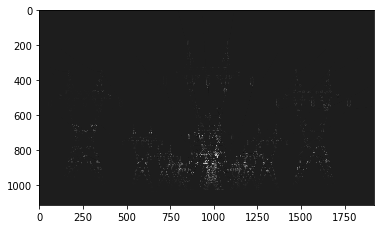

In [82]:
my_show_gray(imgt_harris)   # imgt_harris为towers灰度图每个位置的R值

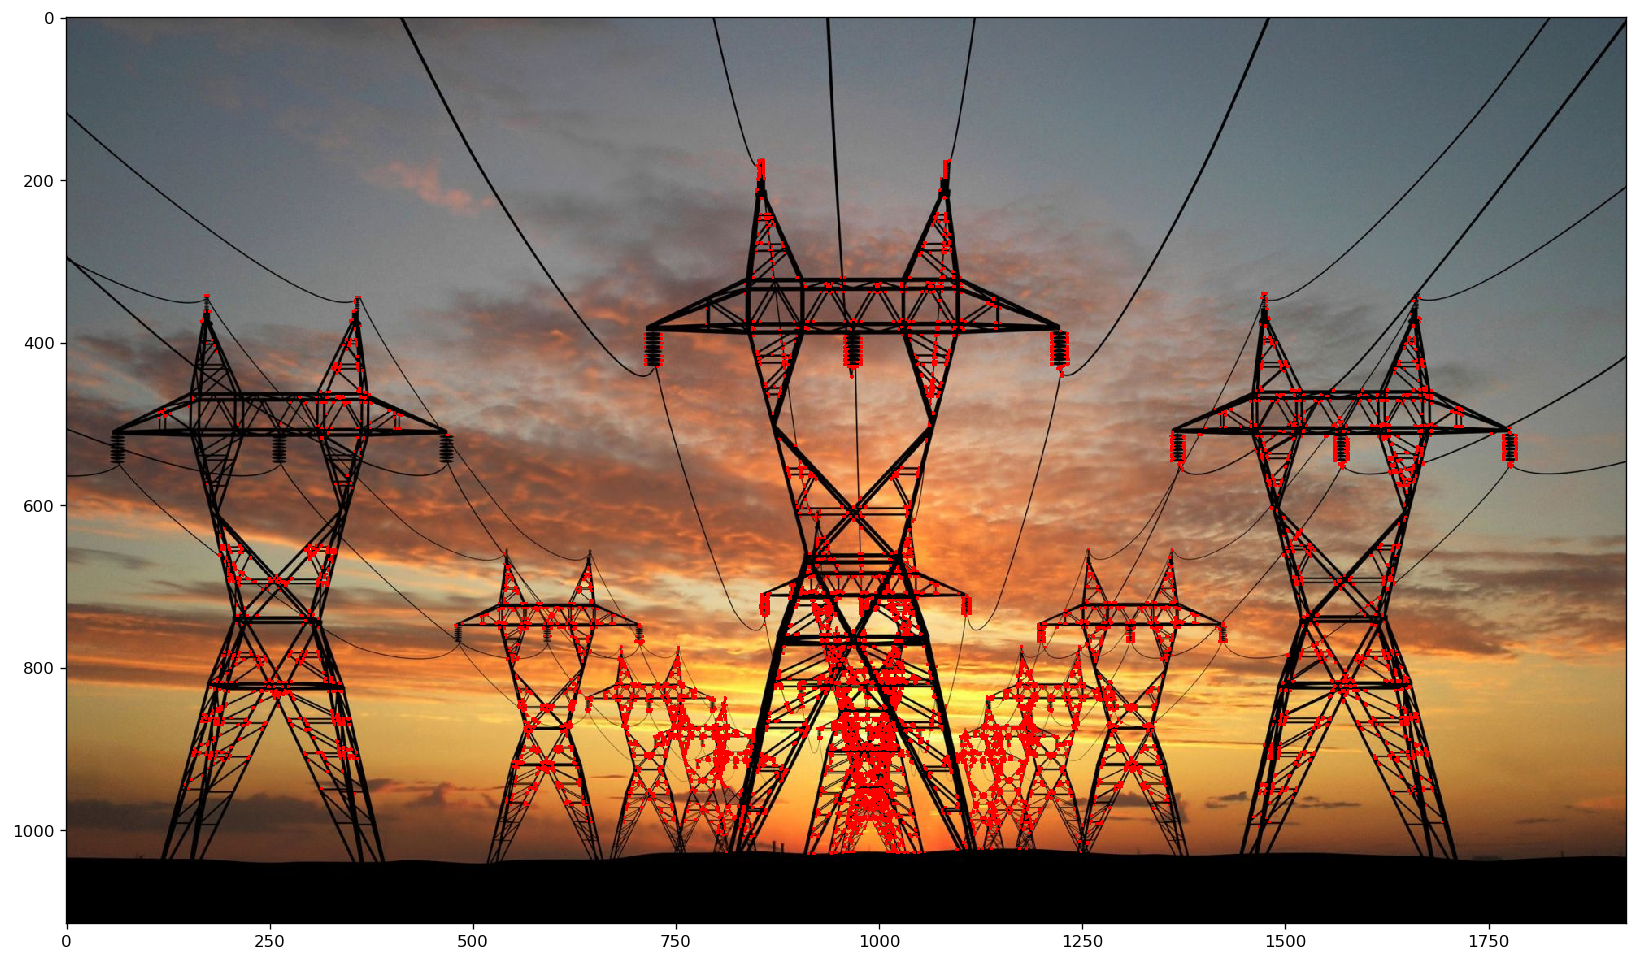

In [85]:
thresholdt = np.max(imgt_harris)*0.02
img_t[imgt_harris>thresholdt] = [0,0,255]
plt.figure(figsize=(20,10),dpi=120)     # 设置输出图片尺寸，长宽20和10英寸，dpi为120
my_show(img_t)

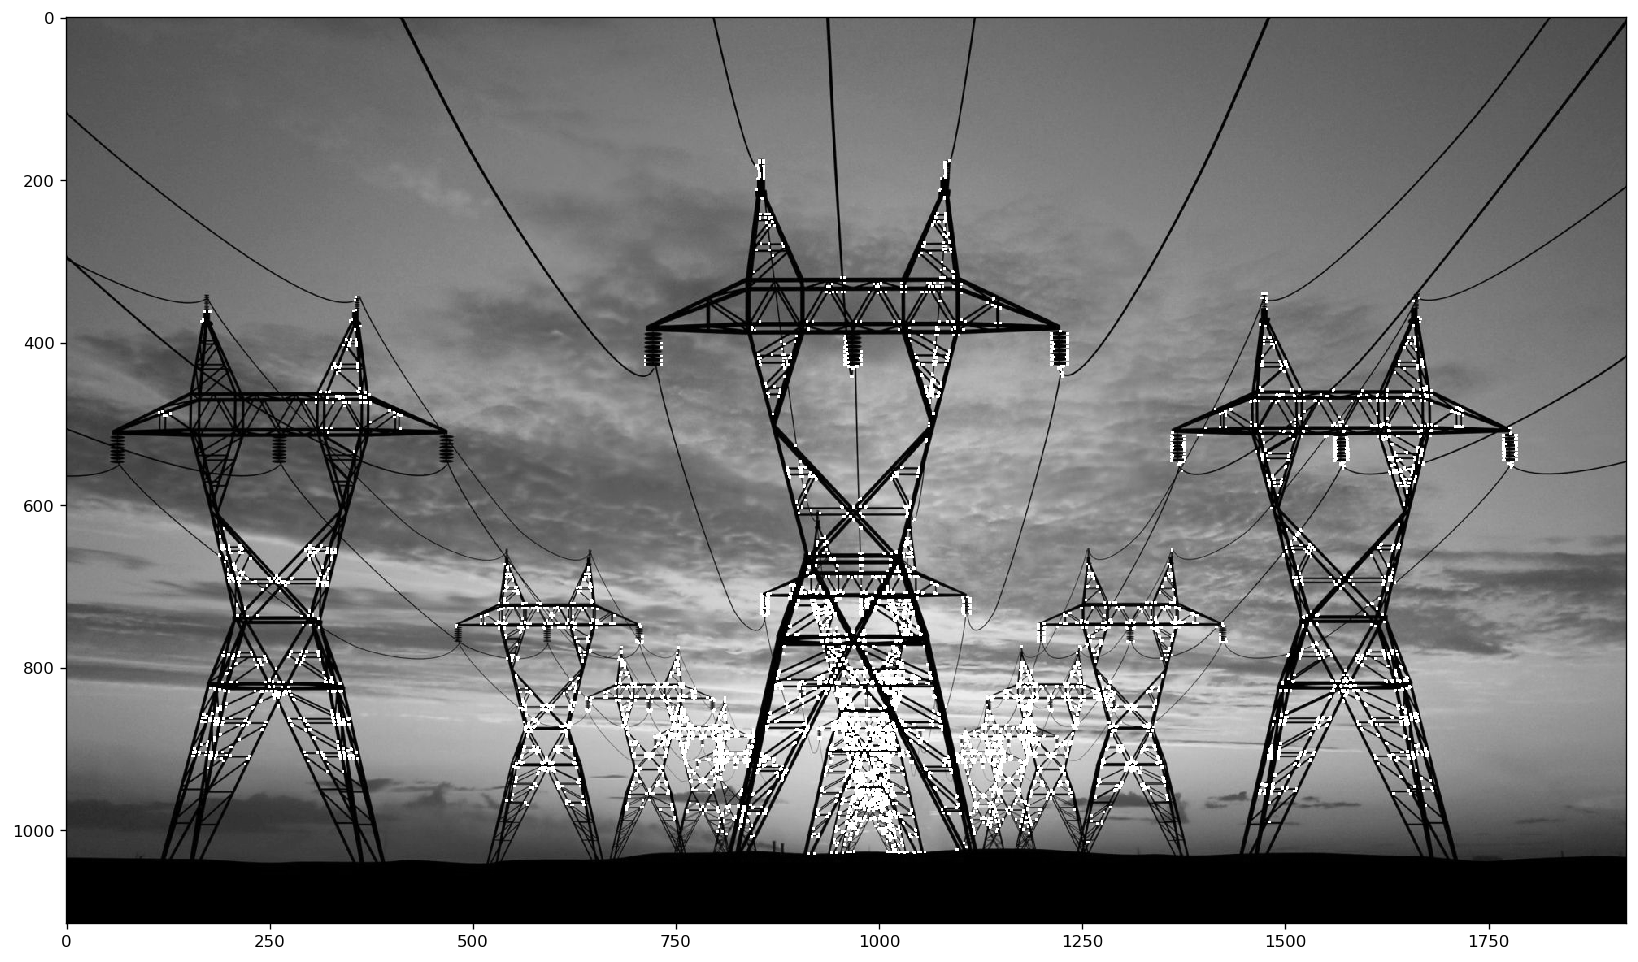

In [86]:
thresholdt = np.max(imgt_harris)*0.03
imgt_gray[imgt_harris>thresholdt] = 255     # 在灰度图中显示角点，用白色显示
plt.figure(figsize=(20,10),dpi=120)
my_show_gray(imgt_gray)

## 7.SIFT

In [100]:
cv2.__version__   # Opencv只有在3.4.2之前的版本才有SIFT模块，该SIFT有版权

'3.4.2'

In [114]:
img = cv2.imread('lenna.jpg')
sift = cv2.xfeatures2d.SIFT_create()   # 创建sift对象
kp = sift.detect(img)   # 创建关键点kp

In [115]:
len(kp)   # img中关键点的长度

1329

In [116]:
kp, des = sift.compute(img,kp)   # des为关键点的描述子
print(des.shape)

(1329, 128)


In [124]:
img_sift = cv2.drawKeypoints(img, kp, outImage=np.array([]),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)   # 画出关键点夹角表示一个主方向，一个辅方向，圈的大小表示角点变化的剧烈程度

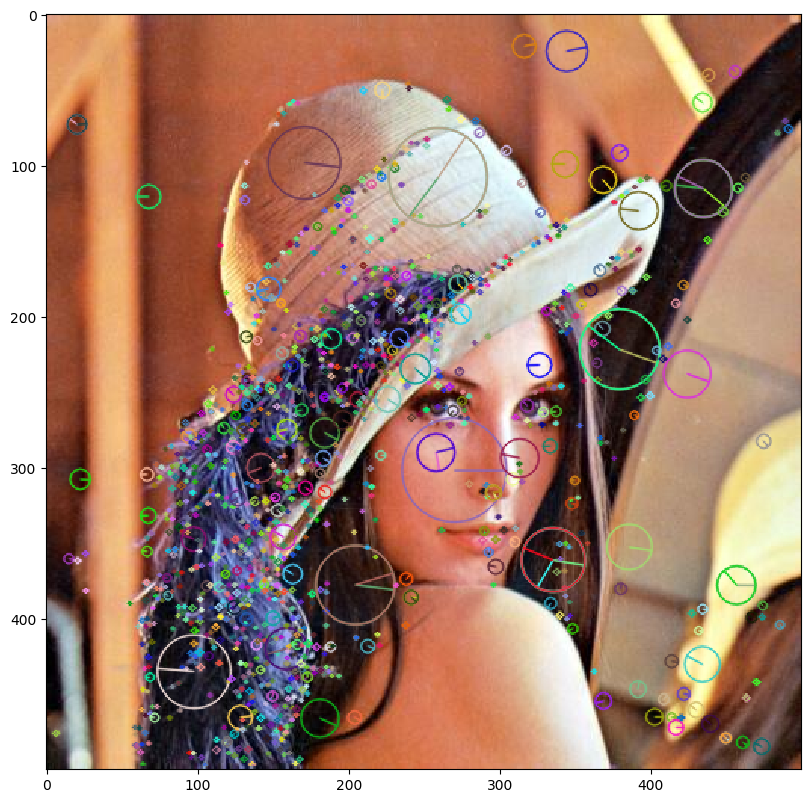

In [125]:
plt.figure(figsize=(10,10),dpi=100)
my_show(img_sift)

In [4]:
np.zeros(3)

array([0., 0., 0.])

In [5]:
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [6]:
np.array([[1,2,3],[4,5,6]])

array([[1, 2, 3],
       [4, 5, 6]])

In [7]:
np.array([2,23,4])

array([ 2, 23,  4])